# import required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# get csv data 

In [2]:
def get_data_file_path (file_name):
    base_path = os.getcwd()
    file_path = 'Data/' + file_name
    file_loc = os.path.join(base_path , file_path)
    return file_loc
    
df_q1 = pd.read_csv(get_data_file_path ('q1.csv'))
df_q2 = pd.read_csv(get_data_file_path ('q2.csv'))
df_q3 = pd.read_csv(get_data_file_path ('q3.csv'))

# Q1: Customer Segmentation: Who are our most valuable customers?

## Customer Segmentation Analysis
* Categorized customers based on total lifetime value (LTV)
* Assigned customers to High, Mid, and Low-value segments
* Calculated key metrics: total revenue

## Key Findings:

* **High-value segment** (25% of customers) drives 66\% of revenue (\$135.4M)  
* **Mid-value segment** (50% of customers) generates 32\% of revenue (\$66.6M)  
* **Low-value segment** (25% of customers) accounts for 2\% of revenue (\$4.3M)  

## Business Insights
* **High-Value (66% revenue)**: Offer premium membership program to 12,372 VIP customers, as losing one customer significantly impacts revenue
* **Mid-Value (32% revenue)**: Create upgrade paths through personalized promotions, with potential $66.6M → $135.4M revenue opportunity
* **Low-Value (2% revenue)**: Design re-engagement campaigns and price-sensitive promotions to increase purchase frequency

# Q1 graph

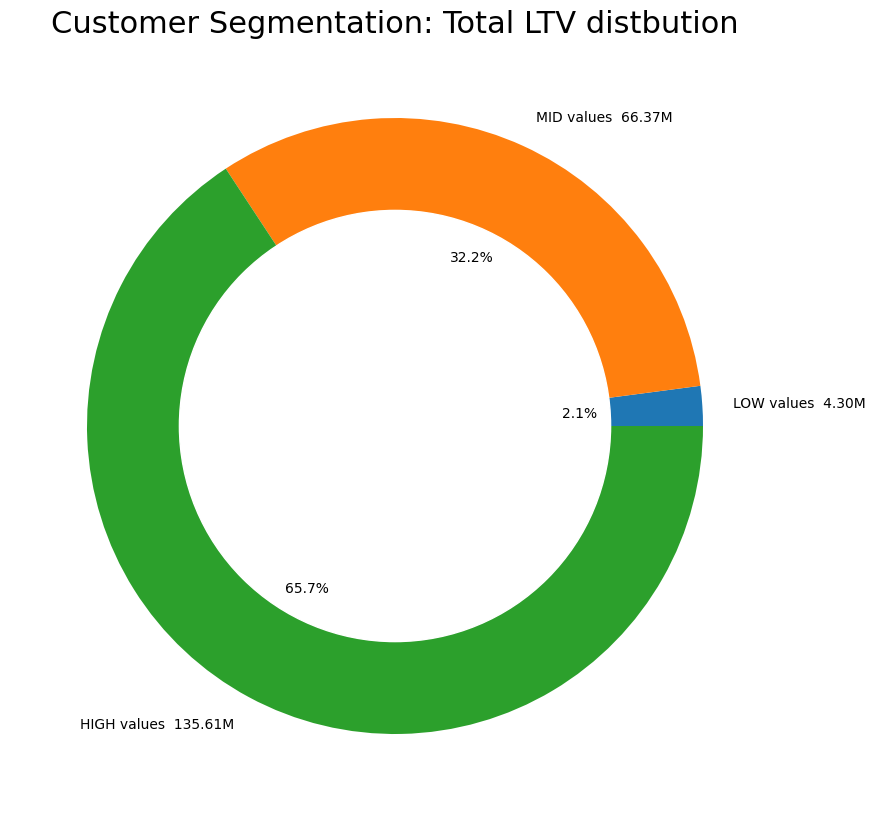

In [3]:
# Data for q1
customer_segment_values = df_q1.customer_segment.values
total_ltv_values = df_q1.total_ltv.values

values = []
for i in range (len (customer_segment_values)):
    values.append (customer_segment_values [i] +  '  ' + f"{total_ltv_values[i]/1_000_000:.2f}M")
    
data = df_q1.total_ltv.values
labels = np.array (values)
title = 'Customer Segmentation: Total LTV distbution'

# pie graph
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(data,labels = labels , autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title (title,fontsize = 22)
plt.show()

# Q2: Cohort Analysis: How do different customer groups generate revenue?

## Cohort Analysis
- Tracked revenue and customer count per cohorts
- Cohorts were grouped by year of first purchase
- Analyzed customer retention at a cohort level


## Key Findings
- Revenue per customer shows an alarming decreasing trend over time
- 2022-2024 cohorts are consistently performing worse than earlier cohorts
- NOTE: Although net revenue is increasing, this is likely due to a larger customer base, which is not reflective of customer value

## Business Insights
- Value extracted from customers is decreasing over time and needs further investigation.
- In 2023 we saw a drop in number of customers acquired, which is concerning.
- With both lowering LTV and decreasing customer acquisition, the company is facing a potential revenue decline.

# Q2 Graph

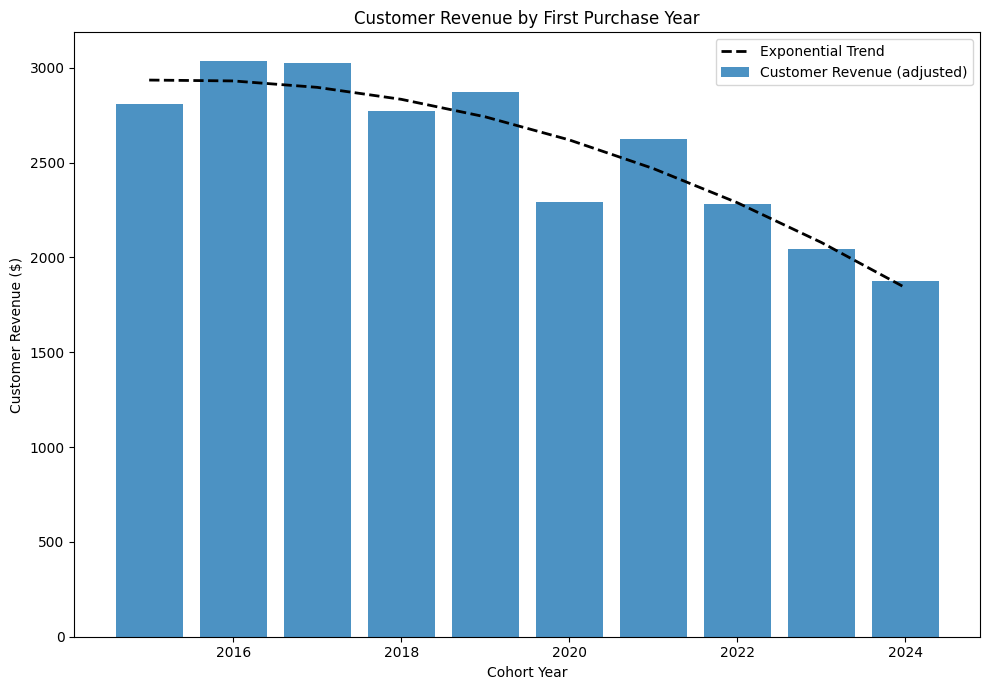

In [4]:
years = df_q2.cohort_year.values
customer_revenue = df_q2.customer_revenue.values

# Create figure
plt.figure(figsize=(10,7))

# Bar chart
plt.bar(years, customer_revenue, alpha=0.8 , label='Customer Revenue (adjusted)')

# Exponential  trend 
x = np.arange(len(years))
trend = np.poly1d(np.polyfit(x, customer_revenue, 2))
plt.plot(years, trend(x), linestyle='--', linewidth=2, label='Exponential Trend' , color = 'black')

# Titles & labels
plt.title('Customer Revenue by First Purchase Year')
plt.xlabel('Cohort Year')
plt.ylabel('Customer Revenue ($)')

# Formatting
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.tight_layout()

# Show
plt.show()

# Q3: Retention Analysis: Which customers haven't purchased recently?

## Customer Retention
- Identified customers at risk of churning
- Analyzed last purchase patterns
- Calculated customer-specific metrics

## Key Findings: 
- Cohort churn stabilizes at ~90% after 2-3 years, indicating a predictable long-term retention pattern.  
- Retention rates are consistently low (8-10%) across all cohorts, suggesting retention issues are systemic rather than specific to certain years.  
- Newer cohorts (2022-2023) show similar churn trajectories, signaling that without intervention, future cohorts will follow the same pattern.  

## Business Insights:
- Strengthen early engagement strategies to target the first 1-2 years with onboarding incentives, loyalty rewards, and personalized offers to improve long-term retention.  
- Re-engage high-value churned customers by focusing on targeted win-back campaigns rather than broad retention efforts, as reactivating valuable users may yield higher ROI.  
- Predict & preempt churn risk and use customer-specific warning indicators to proactively intervene with at-risk users before they lapse.

# Q3 Graph

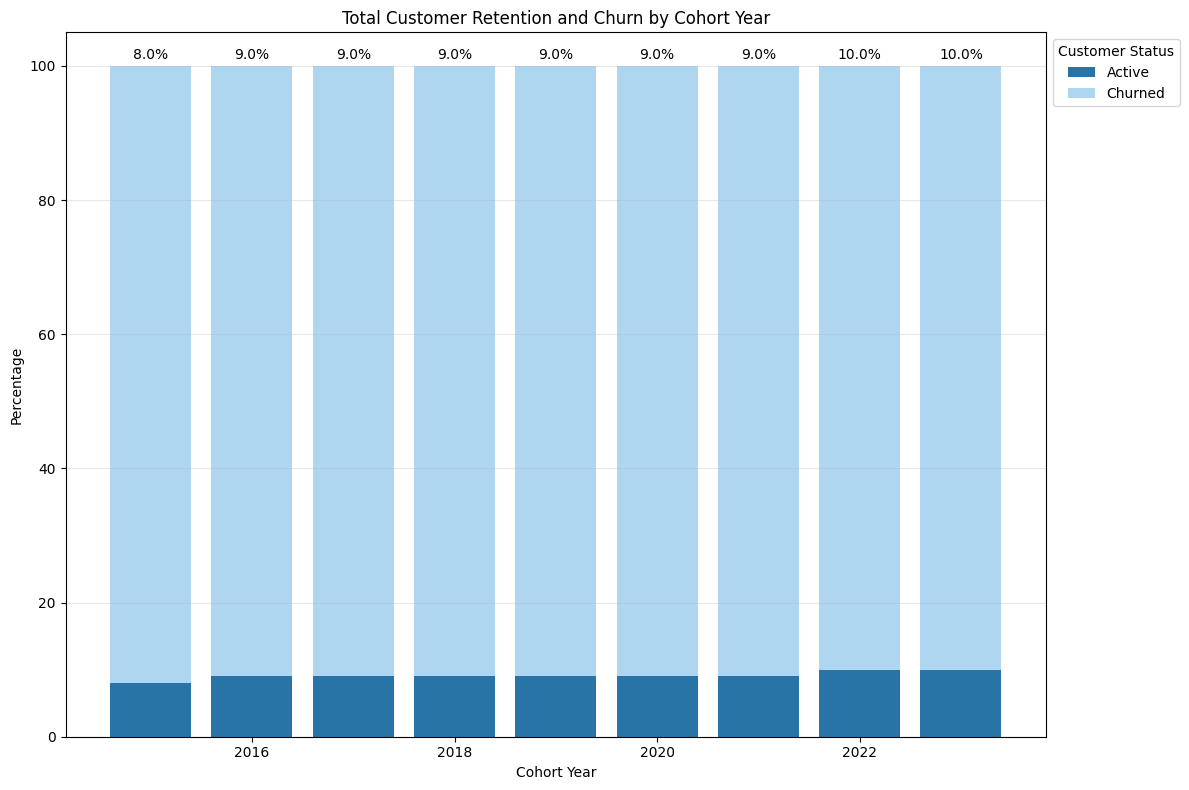

In [5]:
active ,churned = [] ,[]
for i in range (len (df_q3) ):
    if df_q3.iloc[i].customer_status == 'Active' :
        active.append (round (float(df_q3.iloc[i].customer_status_pct) , 2))
    else :
        churned.append (round (float(df_q3.iloc[i].customer_status_pct) , 2))

# get Data
cohort_years = np.unique (df_q3.cohort_year.values)
active = np.array (active) * 100
churned = np.array (churned) * 100

# vertical bars
plt.figure(figsize=(12, 8))
plt.bar(cohort_years, active, label='Active', color='#2874A6')
plt.bar(cohort_years, churned, bottom=active, label='Churned', color='#AED6F1')

# labels and axis 
plt.xlabel('Cohort Year')
plt.ylabel('Percentage')
plt.title('Total Customer Retention and Churn by Cohort Year')
plt.legend(title='Customer Status', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)

# add laver above every bar
for year, active_val, churned_val in zip(cohort_years, active, churned):
    plt.text(year, active_val + churned_val + 1, f'{active_val}%', ha='center', fontsize=10)

plt.tight_layout()
plt.show()